In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import  pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import  pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

import warnings

In [4]:
df = pd.read_csv("/content/drive/MyDrive/VT/BigData/Project/blogfeedback/blogData_train.csv", header=None)
num_columns = 281
column_names = [str(i) for i in range(1, num_columns + 1)]

df.columns = column_names
columns_to_remove = list(range(63, 263))

y = df['281']
X = df.drop(columns=['281'])

# Principal Component Analysis

   Component  Explained Variance
0          1            0.948860
1          2            0.047426
2          3            0.001453
3          4            0.000871
4          5            0.000490


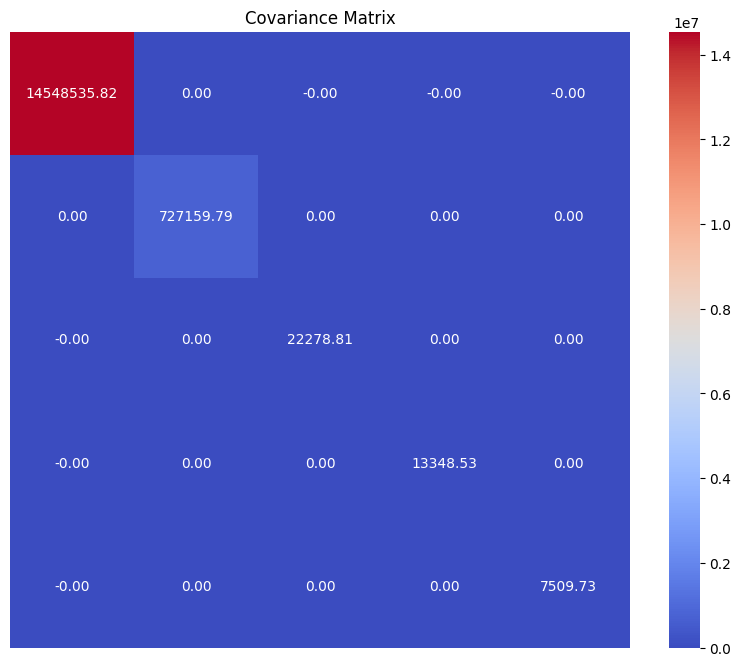

In [5]:
num_components = 5
pca = PCA(n_components=num_components)

X_pca_5 = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame({'Component': range(1, num_components + 1), 'Explained Variance': explained_variance})
print(explained_variance_df)

covariance_matrix = np.cov(X_pca_5, rowvar=False)

plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, fmt="0.2f", cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title('Covariance Matrix')
plt.show()

    Component  Explained Variance
0           1            0.948860
1           2            0.047426
2           3            0.001453
3           4            0.000871
4           5            0.000490
5           6            0.000384
6           7            0.000167
7           8            0.000089
8           9            0.000072
9          10            0.000056
10         11            0.000048
11         12            0.000025
12         13            0.000015
13         14            0.000014
14         15            0.000009


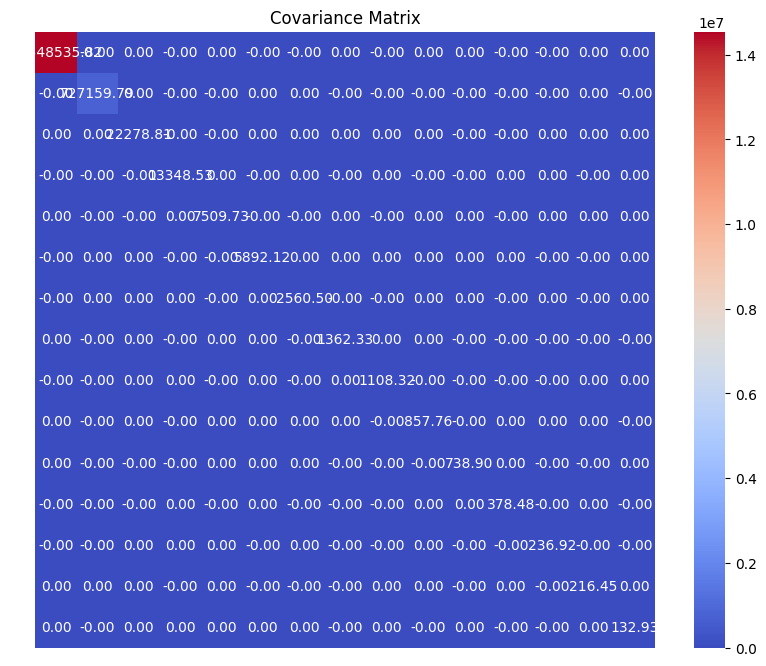

In [6]:
num_components = 15
pca = PCA(n_components=num_components)

X_pca_15 = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame({'Component': range(1, num_components + 1), 'Explained Variance': explained_variance})
print(explained_variance_df)

covariance_matrix = np.cov(X_pca_15, rowvar=False)

plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, fmt="0.2f", cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title('Covariance Matrix')
plt.show()

# Data Augmentation

In [7]:
def augment_data(X, y, num_augmented_samples=10):
    augmented_data = []
    augmented_labels = []

    for i in range(len(X)):
        original_row = X.iloc[i]
        original_label = y[i]

        for _ in range(num_augmented_samples):
            augmented_row = apply_augmentation(original_row)

            augmented_data.append(augmented_row)
            augmented_labels.append(original_label)

    augmented_data = np.vstack(augmented_data)
    augmented_labels = np.hstack(augmented_labels)

    return augmented_data, augmented_labels

def apply_augmentation(row):
    noise = np.random.normal(0, 0.1, len(row))
    augmented_row = row + noise
    return augmented_row

num_augmented_samples = 2

augmented_X, augmented_y = augment_data(X, y, num_augmented_samples)
scaler = StandardScaler()
X_std = scaler.fit_transform(augmented_X)

X_train, X_test, y_train, y_test = train_test_split(X_std, augmented_y, test_size=0.2, random_state=42)


# Linear Regressor

Linear Regression MSE: 869.4420471030738
Linear Regression R-squared: 0.3475345781306529


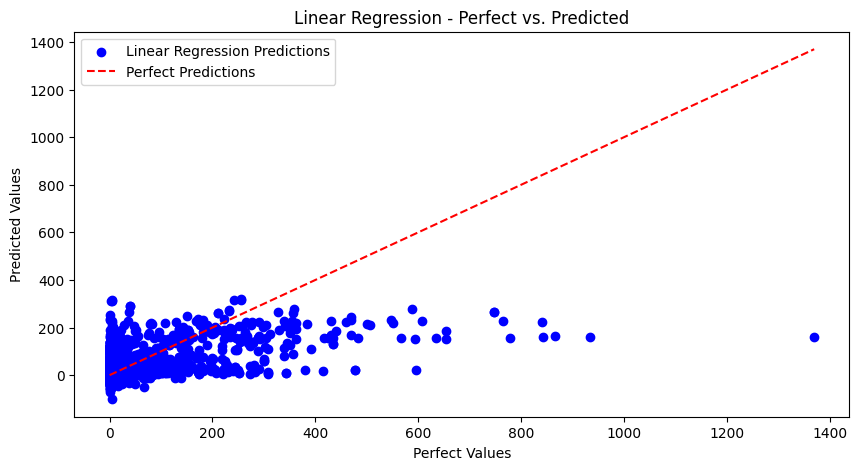

In [7]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print("Linear Regression MSE:", linear_mse)
print("Linear Regression R-squared:", linear_r2)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Predictions')
plt.title('Linear Regression - Perfect vs. Predicted')
plt.xlabel('Perfect Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Lasso Regressor

Lasso Regression MSE: 868.6429186470145
Lasso Regression R-squared: 0.3481342773135344


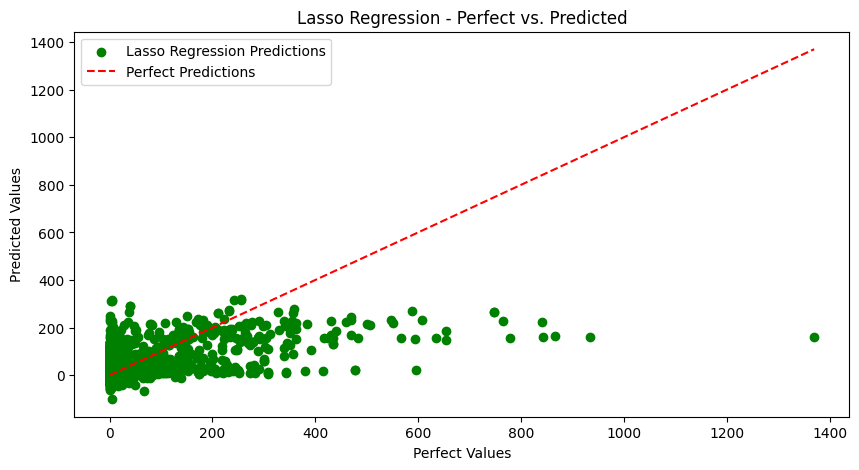

In [8]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R-squared:", lasso_r2)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lasso, color='green', label='Lasso Regression Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Predictions')
plt.title('Lasso Regression - Perfect vs. Predicted')
plt.xlabel('Perfect Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Decision Tree Regressor

In [10]:
dt_model = DecisionTreeRegressor()

parameters = {'splitter': ['best', 'random'],
              'max_depth': [None, 5, 10],
              'max_features': [None, 'auto']}

scoring=["neg_mean_squared_error", "r2"]

dt_gs = GridSearchCV(dt_model, parameters,
                     scoring = scoring,
                     refit = 'neg_mean_squared_error',
                      cv = 3,
                     verbose = 1)
dt_gs.fit(X_train, y_train)

results_dt = pd.DataFrame(dt_gs.cv_results_)
results_dt[['params',
         'mean_test_neg_mean_squared_error',
         'mean_test_r2']]

Fitting 3 folds for each of 12 candidates, totalling 36 fits


,params,mean_test_neg_mean_squared_error,mean_test_r2
0,"{'max_depth': None, 'max_features': None, 'spl...",-994.089891,0.312535
1,"{'max_depth': None, 'max_features': None, 'spl...",-1064.342303,0.261224
2,"{'max_depth': None, 'max_features': 'auto', 's...",-1032.780414,0.285257
3,"{'max_depth': None, 'max_features': 'auto', 's...",-1003.759170,0.301496
4,"{'max_depth': 5, 'max_features': None, 'splitt...",-648.827681,0.552729
5,"{'max_depth': 5, 'max_features': None, 'splitt...",-765.940972,0.469611
6,"{'max_depth': 5, 'max_features': 'auto', 'spli...",-650.158331,0.551787
7,"{'max_depth': 5, 'max_features': 'auto', 'spli...",-722.439739,0.500851
8,"{'max_depth': 10, 'max_features': None, 'split...",-912.296939,0.370767
9,"{'max_depth': 10, 'max_features': None, 'split...",-851.936012,0.409876


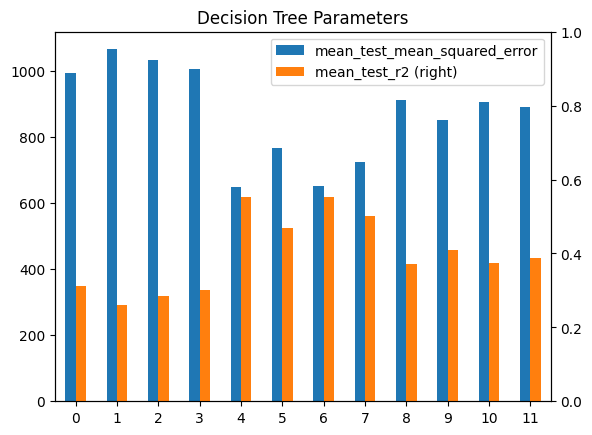

In [11]:
results_dt['mean_test_mean_squared_error'] = results_dt['mean_test_neg_mean_squared_error'] * -1

_ = results_dt[['mean_test_mean_squared_error',
         'mean_test_r2']].plot( kind= 'bar' , secondary_y= 'mean_test_r2' , rot= 0 )
plt.ylim(0, 1)
plt.title('Decision Tree Parameters')
plt.show()

# KNN Regressor

In [14]:
neigh = KNeighborsRegressor()

parameters = {'n_neighbors': [3, 5, 8],
              'weights': ['uniform', 'distance']}

scoring=["neg_mean_squared_error", "r2"]

neigh_gs = GridSearchCV(neigh, parameters,
                     scoring = scoring,
                     refit = 'neg_mean_squared_error',
                      cv = 3,
                     verbose = 2)
neigh_gs.fit(X_train, y_train)

results_knn = pd.DataFrame(neigh_gs.cv_results_)
results_knn[['params',
         'mean_test_neg_mean_squared_error',
         'mean_test_r2']]

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .....................n_neighbors=3, weights=uniform; total time=  26.7s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  25.1s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  29.2s
[CV] END ....................n_neighbors=3, weights=distance; total time=  25.6s
[CV] END ....................n_neighbors=3, weights=distance; total time=  24.7s
[CV] END ....................n_neighbors=3, weights=distance; total time=  25.1s
[CV] END .....................n_neighbors=5, weights=uniform; total time=  25.6s
[CV] END .....................n_neighbors=5, weights=uniform; total time=  24.4s
[CV] END .....................n_neighbors=5, weights=uniform; total time=  25.2s
[CV] END ....................n_neighbors=5, weights=distance; total time=  25.6s
[CV] END ....................n_neighbors=5, weights=distance; total time=  24.1s
[CV] END ....................n_neighbors=5, weigh

,params,mean_test_neg_mean_squared_error,mean_test_r2
0,"{'n_neighbors': 3, 'weights': 'uniform'}",-765.100510,0.472092
1,"{'n_neighbors': 3, 'weights': 'distance'}",-742.988308,0.487502
2,"{'n_neighbors': 5, 'weights': 'uniform'}",-773.116447,0.466287
3,"{'n_neighbors': 5, 'weights': 'distance'}",-752.597005,0.480585
4,"{'n_neighbors': 8, 'weights': 'uniform'}",-775.417467,0.464705
5,"{'n_neighbors': 8, 'weights': 'distance'}",-757.867259,0.476890


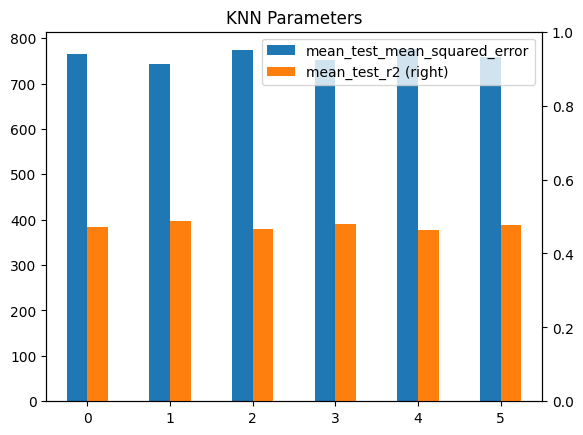

In [15]:
results_knn['mean_test_mean_squared_error'] = results_knn['mean_test_neg_mean_squared_error'] * -1

_ = results_knn[['mean_test_mean_squared_error',
         'mean_test_r2']].plot( kind= 'bar' , secondary_y= 'mean_test_r2' , rot= 0 )
plt.ylim(0, 1)
plt.title('KNN Parameters')
plt.show()



```
# This is formatted as code
```

# MLP Regressor

In [17]:
regr = MLPRegressor()

parameters = {'hidden_layer_sizes': [(100,), (100, 50,)],
              'activation': ['tanh', 'relu'],
              'solver': ['adam'],
              'learning_rate': ['constant', 'adaptive']}

scoring=["neg_mean_squared_error", "r2"]

mlp_gs = GridSearchCV(regr, parameters,
                     scoring = scoring,
                     refit = 'neg_mean_squared_error',
                      cv = 3,
                     verbose = 2)
mlp_gs.fit(X_train, y_train)

results_mlp = pd.DataFrame(mlp_gs.cv_results_)
results_mlp[['params',
         'mean_test_neg_mean_squared_error',
         'mean_test_r2']]

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time= 1.4min
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time= 1.3min
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time= 1.3min
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time= 1.3min
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time= 1.3min
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time= 1.3min
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time= 1.8min
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time= 1.7min
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learni

,params,mean_test_neg_mean_squared_error,mean_test_r2
0,"{'activation': 'tanh', 'hidden_layer_sizes': (...",-1386.053082,0.037495
1,"{'activation': 'tanh', 'hidden_layer_sizes': (...",-1380.035068,0.041515
2,"{'activation': 'tanh', 'hidden_layer_sizes': (...",-850.146332,0.412376
3,"{'activation': 'tanh', 'hidden_layer_sizes': (...",-830.355275,0.424260
4,"{'activation': 'relu', 'hidden_layer_sizes': (...",-870.015730,0.397902
5,"{'activation': 'relu', 'hidden_layer_sizes': (...",-872.338882,0.396278
6,"{'activation': 'relu', 'hidden_layer_sizes': (...",-690.926032,0.522368
7,"{'activation': 'relu', 'hidden_layer_sizes': (...",-689.289132,0.523828


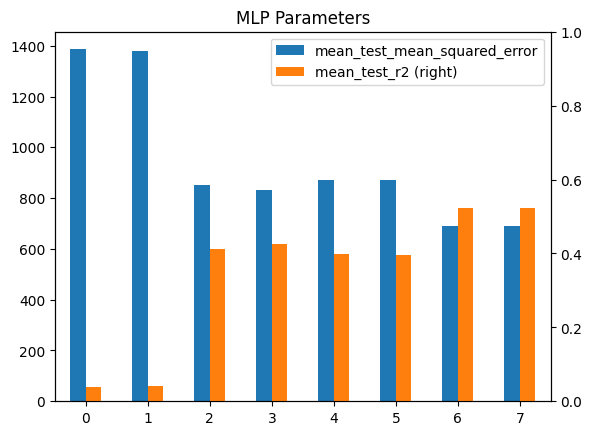

In [18]:
results_mlp['mean_test_mean_squared_error'] = results_mlp['mean_test_neg_mean_squared_error'] * -1

_ = results_mlp[['mean_test_mean_squared_error',
         'mean_test_r2']].plot( kind= 'bar' , secondary_y= 'mean_test_r2' , rot= 0 )
plt.ylim(0, 1)
plt.title('MLP Parameters')
plt.show()